# We will work on Exploring and Analyzing Data about House Prices ,Then find solutions to Predict the final price of each home.

<img src="https://www.vancouverrealestatepodcast.com/wp-content/uploads/2018/10/Detached-home-prices.jpg" alt="Housing Price Prediction 2019 Archives - Vancouver Real Estate Podcast" jsname="HiaYvf" jsaction="load:XAeZkd;" class="n3VNCb" data-noaft="1" style="width: 834px; height: 525.5px; margin: 0px;">

## This link is for data and describe it
#### https://www.kaggle.com/gauravduttakiit/kidney-kronicle

## Preparing data for Analysis & Modelling

In [2]:
# Importing libaraies

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
### Importing the datasets
train = pd.read_csv('E:/house-prices/train.csv')
test = pd.read_csv('E:/house-prices/test.csv')

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
print(train.shape)
print('-'*50)
print(test.shape)

(1460, 81)
--------------------------------------------------
(1459, 80)


#### The described method will help to see how data has been spread for numerical values.
#### We can clearly see the minimum value, mean values, different percentile values, and maximum values.


In [7]:
print('Train.describe')
train.describe().T

Train.describe


count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [8]:
print('Test.describe')
test.describe().T

Test.describe


count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [9]:
data = pd.concat([train, test],axis=0,sort=False)

In [10]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [11]:
data.shape

(2919, 81)

In [12]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

#### Let's drop the Id column. Id column is seems to be an unique identifier for each row so we are dropping that it won't help us to find any insights from the data

### Extract Numerical & Categorical Features

In [13]:
num_features=[col for col in train.columns if train[col].dtype!='O']
num_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
cat_features=[col for col in train.columns if train[col].dtype=='O']
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Total unique categories in our categorical features to check if any dirtiness in data or not

In [15]:
for col in cat_features:
    print('{} has {} values '.format(col,train[col].unique()))
    print('\n')

MSZoning has ['RL' 'RM' 'C (all)' 'FV' 'RH'] values 


Street has ['Pave' 'Grvl'] values 


Alley has [nan 'Grvl' 'Pave'] values 


LotShape has ['Reg' 'IR1' 'IR2' 'IR3'] values 


LandContour has ['Lvl' 'Bnk' 'Low' 'HLS'] values 


Utilities has ['AllPub' 'NoSeWa'] values 


LotConfig has ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] values 


LandSlope has ['Gtl' 'Mod' 'Sev'] values 


Neighborhood has ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] values 


Condition1 has ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] values 


Condition2 has ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] values 


BldgType has ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] values 


HouseStyle has ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] values 

### Cleaning missing values

In [16]:
print(data.isna().sum().sort_values(ascending=False))

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
Foundation          0
Id                  0
Length: 81, dtype: int64


<AxesSubplot:>

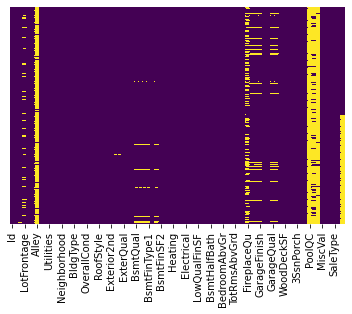

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### let's drop [PoolQC, MiscFeature, Alley, Fence] column because it has above 70% of missing values

In [18]:
data.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1,inplace=True) 

 ### I Clean missing values using Random Value Imputation Because missing values is high in most features and This the best way to To maintain distrbuation For each feature.

In [19]:
data=data.copy()

In [20]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [21]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [22]:
for col in data:
    Random_value_imputation(col)

In [23]:
data[num_features].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

<AxesSubplot:>

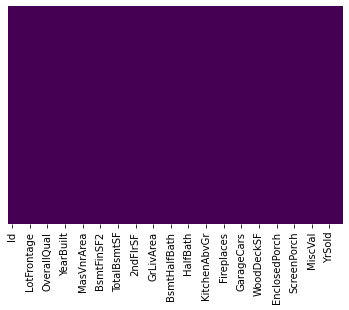

In [24]:
sns.heatmap(data[num_features].isnull(),yticklabels=False,cbar=False,cmap='viridis')

## delete data duplicated

In [25]:
duplicate = data.duplicated()
print(duplicate.sum())

0


 ### Threre is no data duplicated

### Outlier

# 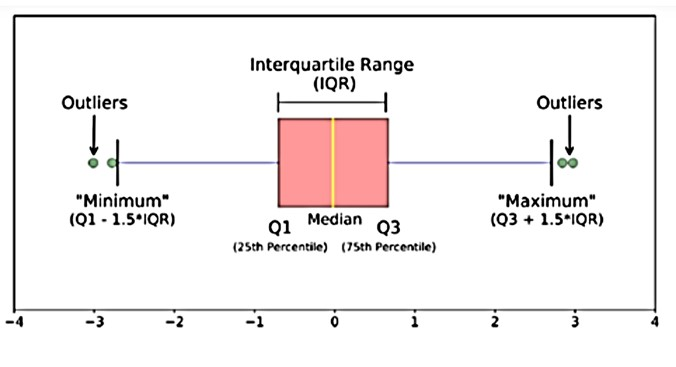

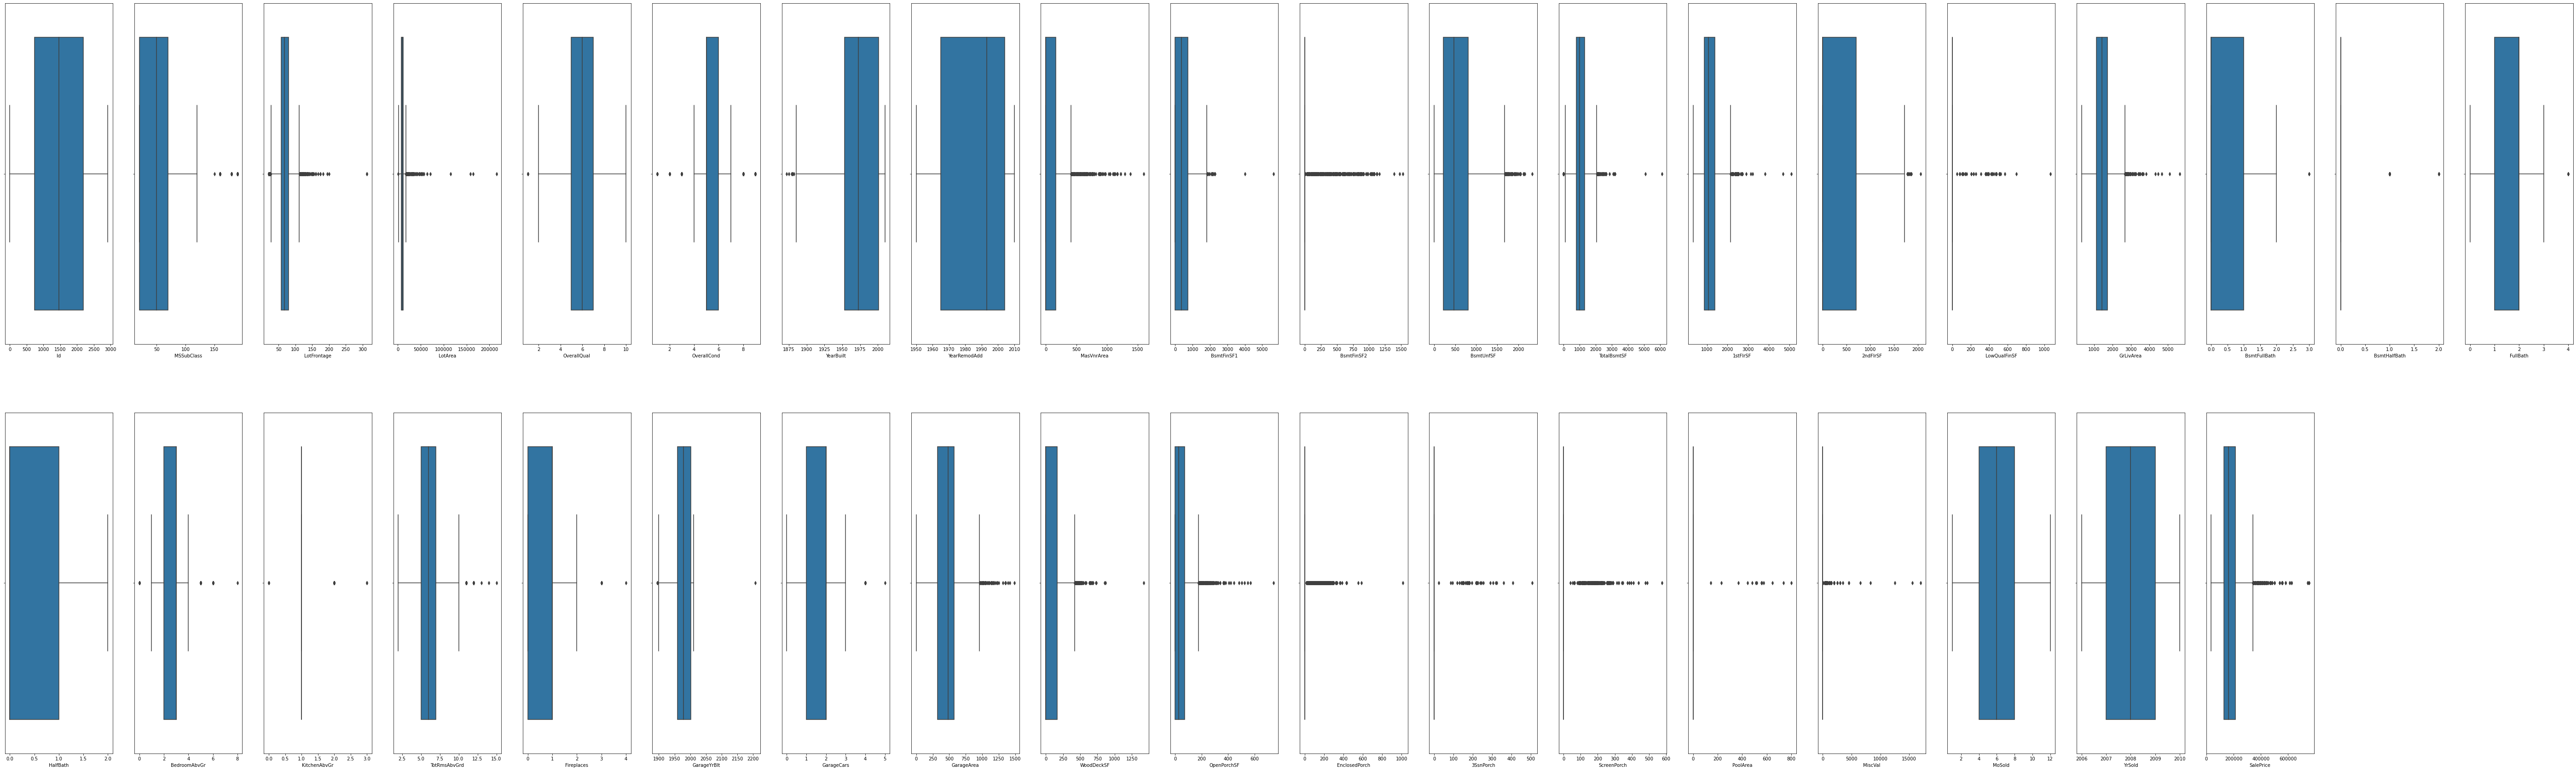

In [26]:
plt.figure(figsize=(100,30))
for i,col in enumerate(num_features):
    plt.subplot(2,20,i+1)
    sns.boxplot(data[col])

### Almost we don't have Outlier in our num_features

# check co-relation in data

In [27]:
co_relation=data.corr()
co_relation

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.008931    -0.014966 -0.040746    -0.029771   
MSSubClass     0.008931    1.000000    -0.356721 -0.201730     0.033638   
LotFrontage   -0.014966   -0.356721     1.000000  0.324188     0.197314   
LotArea       -0.040746   -0.201730     0.324188  1.000000     0.100541   
OverallQual   -0.029771    0.033638     0.197314  0.100541     1.000000   
OverallCond   -0.002839   -0.065625    -0.070369 -0.035617    -0.093847   
YearBuilt     -0.016581    0.034409     0.117667  0.024128     0.597554   
YearRemodAdd  -0.050438    0.043315     0.083332  0.021612     0.571532   
MasVnrArea    -0.023072    0.004363     0.188244  0.124427     0.430578   
BsmtFinSF1    -0.016961   -0.064284     0.185911  0.194032     0.281734   
BsmtFinSF2     0.018170   -0.072431     0.024639  0.084107    -0.042605   
BsmtUnfSF     -0.014481   -0.125944     0.107880  0.021382     0.275128   
TotalBsmtSF   -0.023905   -0.220524     0.310241  0.252909     0.546062   
1stFlrSF      -0.008678   -0.248641     0.392188  0.332460     0.479152   
2ndFlrSF      -0.022252    0.309309     0.018080  0.031515     0.245596   
LowQualFinSF  -0.037816    0.026482    -0.002110  0.000554    -0.048393   
GrLivArea     -0.029046    0.071677     0.319202  0.284519     0.575126   
BsmtFullBath  -0.000318    0.010436     0.099747  0.126671     0.165060   
BsmtHalfBath   0.010243   -0.001728    -0.033732  0.025838    -0.040519   
FullBath      -0.009946    0.139140     0.159968  0.125826     0.528483   
HalfBath      -0.015358    0.178750     0.037686  0.034244     0.272668   
BedroomAbvGr   0.003074   -0.008796     0.191552  0.132801     0.073075   
KitchenAbvGr  -0.011702    0.260155     0.003246 -0.020854    -0.159325   
TotRmsAbvGrd  -0.029368    0.040509     0.291752  0.213802     0.389761   
Fireplaces    -0.035236   -0.055151     0.206506  0.261185     0.390753   
GarageYrBlt   -0.026297    0.068100     0.080476 -0.004976     0.531219   
GarageCars    -0.010066   -0.046564     0.277539  0.180415     0.600591   
GarageArea    -0.009150   -0.103451     0.313173  0.213266     0.565194   
WoodDeckSF    -0.007056   -0.017654     0.107091  0.158045     0.255317   
OpenPorchSF    0.009960   -0.015923     0.136184  0.104797     0.298084   
EnclosedPorch  0.021609   -0.020867     0.013098  0.020974    -0.139256   
3SsnPorch     -0.046538   -0.037529     0.017140  0.015995     0.018715   
ScreenPorch    0.022208   -0.049181     0.051315  0.054375     0.042910   
PoolArea       0.014332   -0.003080     0.145353  0.093708     0.030740   
MiscVal        0.008244   -0.028867     0.038889  0.069029     0.005562   
MoSold         0.006448   -0.001231     0.011182  0.004156     0.030405   
YrSold        -0.256050   -0.015028    -0.011317 -0.024234    -0.019614   
SalePrice     -0.017053   -0.028250     0.160974  0.159664     0.392344   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id               -0.002839  -0.016581     -0.050438   -0.023072   -0.016961   
MSSubClass       -0.065625   0.034409      0.043315    0.004363   -0.064284   
LotFrontage      -0.070369   0.117667      0.083332    0.188244    0.185911   
LotArea          -0.035617   0.024128      0.021612    0.124427    0.194032   
OverallQual      -0.093847   0.597554      0.571532    0.430578    0.281734   
OverallCond       1.000000  -0.368477      0.047654   -0.135230   -0.050430   
YearBuilt        -0.368477   1.000000      0.612235    0.312069    0.279564   
YearRemodAdd      0.047654   0.612235      1.000000    0.195974    0.152090   
MasVnrArea       -0.135230   0.312069      0.195974    1.000000    0.299372   
BsmtFinSF1       -0.050430   0.279564      0.152090    0.299372    1.000000   
BsmtFinSF2        0.041359  -0.027507     -0.061959   -0.015924   -0.055038   
BsmtUnfSF        -0.138211   0.130489      0.165161    0.091733   -0.477401   
TotalBsmtSF      -0.171988   0.406543      0.295302    0.393197    0

<AxesSubplot:>

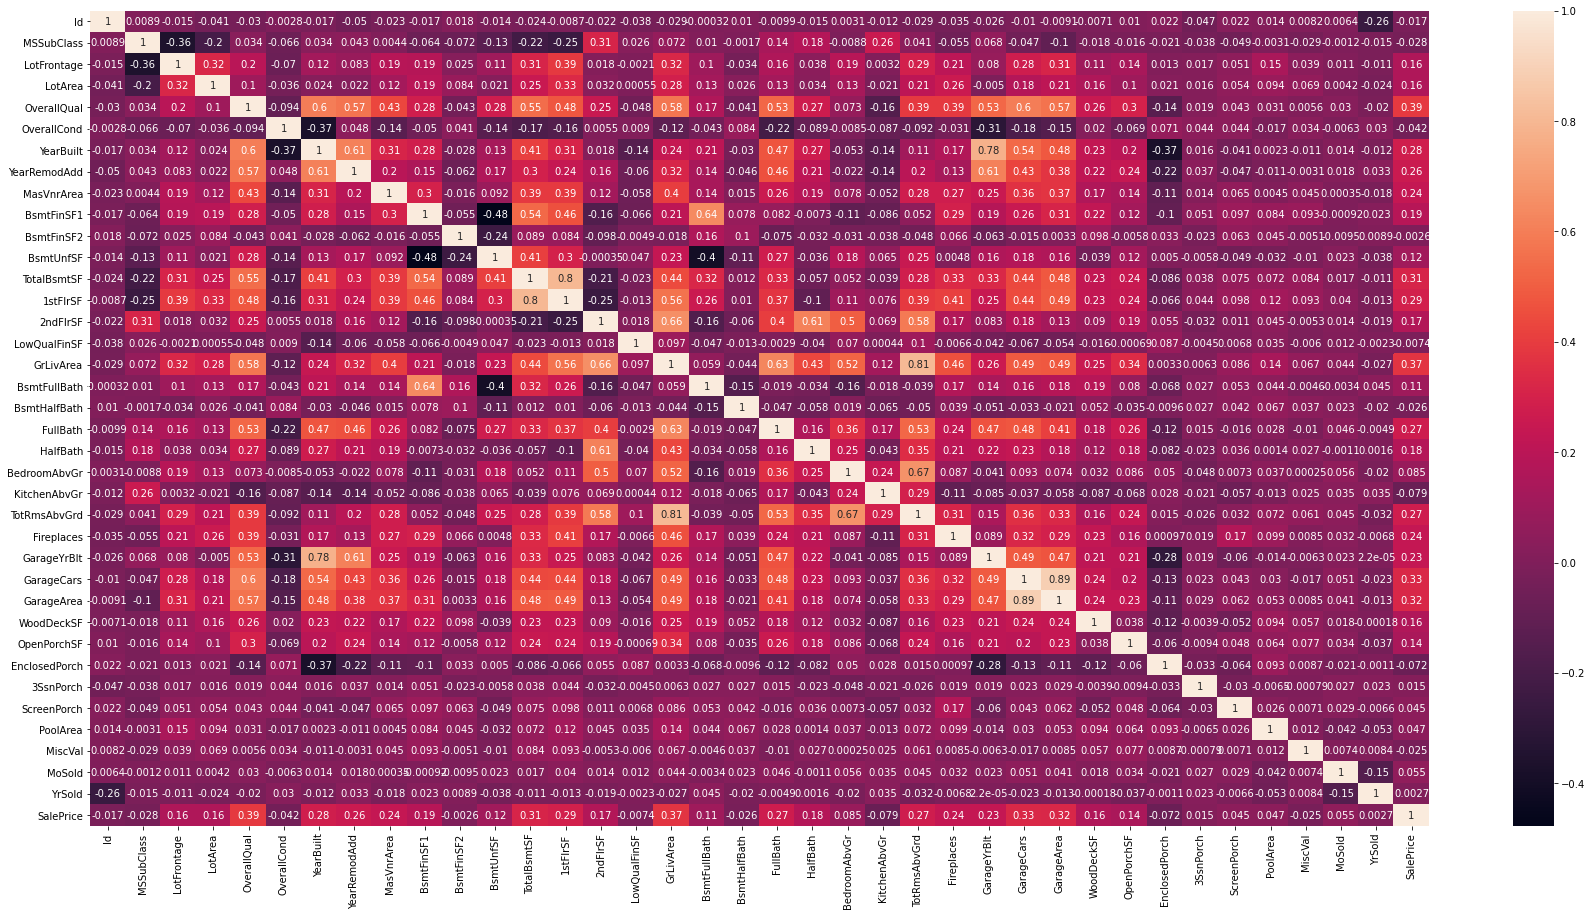

In [28]:
# Correlations
plt.figure(figsize=(30,15))
corr_df = data.corr()
sns.heatmap(corr_df,annot=True)

In [29]:
co_relation=data.corr()["SalePrice"]
co_relation

Id              -0.017053
MSSubClass      -0.028250
LotFrontage      0.160974
LotArea          0.159664
OverallQual      0.392344
OverallCond     -0.042274
YearBuilt        0.280804
YearRemodAdd     0.260600
MasVnrArea       0.236401
BsmtFinSF1       0.189726
BsmtFinSF2      -0.002603
BsmtUnfSF        0.116111
TotalBsmtSF      0.309807
1stFlrSF         0.292771
2ndFlrSF         0.172105
LowQualFinSF    -0.007414
GrLivArea        0.372116
BsmtFullBath     0.108976
BsmtHalfBath    -0.026172
FullBath         0.271617
HalfBath         0.175205
BedroomAbvGr     0.085263
KitchenAbvGr    -0.079174
TotRmsAbvGrd     0.273853
Fireplaces       0.237211
GarageYrBlt      0.233627
GarageCars       0.325477
GarageArea       0.321232
WoodDeckSF       0.164316
OpenPorchSF      0.144163
EnclosedPorch   -0.071946
3SsnPorch        0.014738
ScreenPorch      0.045399
PoolArea         0.046531
MiscVal         -0.025383
MoSold           0.055088
YrSold           0.002713
SalePrice        1.000000
Name: SalePr

In [30]:
co_relation.abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.392344
GrLivArea        0.372116
GarageCars       0.325477
GarageArea       0.321232
TotalBsmtSF      0.309807
1stFlrSF         0.292771
YearBuilt        0.280804
TotRmsAbvGrd     0.273853
FullBath         0.271617
YearRemodAdd     0.260600
Fireplaces       0.237211
MasVnrArea       0.236401
GarageYrBlt      0.233627
BsmtFinSF1       0.189726
HalfBath         0.175205
2ndFlrSF         0.172105
WoodDeckSF       0.164316
LotFrontage      0.160974
LotArea          0.159664
OpenPorchSF      0.144163
BsmtUnfSF        0.116111
BsmtFullBath     0.108976
BedroomAbvGr     0.085263
KitchenAbvGr     0.079174
EnclosedPorch    0.071946
MoSold           0.055088
PoolArea         0.046531
ScreenPorch      0.045399
OverallCond      0.042274
MSSubClass       0.028250
BsmtHalfBath     0.026172
MiscVal          0.025383
Id               0.017053
3SsnPorch        0.014738
LowQualFinSF     0.007414
YrSold           0.002713
BsmtFinSF2       0.002603
Name: SalePr

In [31]:
co_relation.abs().sort_values(ascending=False)[1:]

OverallQual      0.392344
GrLivArea        0.372116
GarageCars       0.325477
GarageArea       0.321232
TotalBsmtSF      0.309807
1stFlrSF         0.292771
YearBuilt        0.280804
TotRmsAbvGrd     0.273853
FullBath         0.271617
YearRemodAdd     0.260600
Fireplaces       0.237211
MasVnrArea       0.236401
GarageYrBlt      0.233627
BsmtFinSF1       0.189726
HalfBath         0.175205
2ndFlrSF         0.172105
WoodDeckSF       0.164316
LotFrontage      0.160974
LotArea          0.159664
OpenPorchSF      0.144163
BsmtUnfSF        0.116111
BsmtFullBath     0.108976
BedroomAbvGr     0.085263
KitchenAbvGr     0.079174
EnclosedPorch    0.071946
MoSold           0.055088
PoolArea         0.046531
ScreenPorch      0.045399
OverallCond      0.042274
MSSubClass       0.028250
BsmtHalfBath     0.026172
MiscVal          0.025383
Id               0.017053
3SsnPorch        0.014738
LowQualFinSF     0.007414
YrSold           0.002713
BsmtFinSF2       0.002603
Name: SalePrice, dtype: float64

# Analysing Distributions of data

In [32]:
plt.figure(figsize=(200,200))
for i,feature in enumerate(num_features):
    plt.subplot(5,9,i+1)
    data[feature].hist()
    plt.title(feature)

### let's check the label distribution for categorical data

In [33]:
len(cat_features)

43

 ### before we handle the dummies values for categrocial features , let's first build an important functions that we'll need , to know the relationship & the correlations between features & each other

In [34]:
## first a function to make pie chart depend on the the value counts & their index

def make_pie(feature) : 
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()

In [35]:
## then a function for making countplot using seaborn
def make_countplot(feature) :
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("prism", 3)) 

### Defining violin and scatter plot & kde_plot functions

In [36]:
def violin(col):
    fig = px.violin(data, y=col, box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(data, x=col1, y=col2)
    return fig.show()

def make_kdeplot(feature) : 
    sns.kdeplot(data[feature], shade=True)

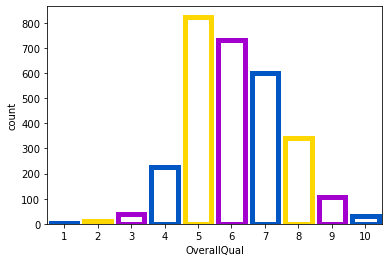

In [37]:
make_countplot("OverallQual")

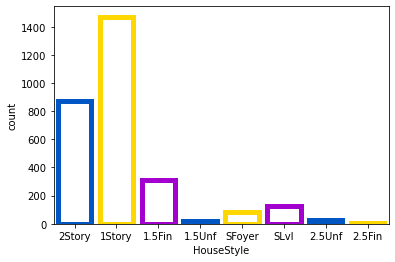

In [38]:
make_countplot("HouseStyle")

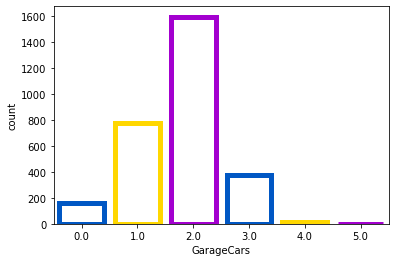

In [39]:
make_countplot("GarageCars")

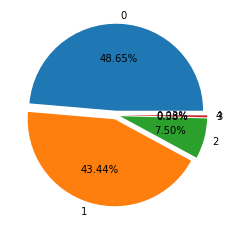

In [40]:
make_pie('Fireplaces')

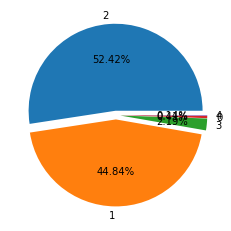

In [41]:
make_pie('FullBath')

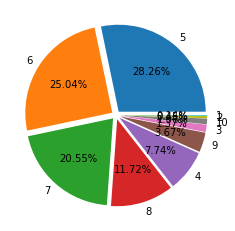

In [42]:
make_pie("OverallQual")

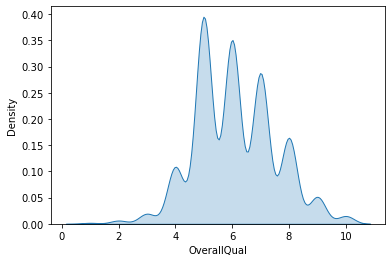

In [43]:
make_kdeplot('OverallQual')

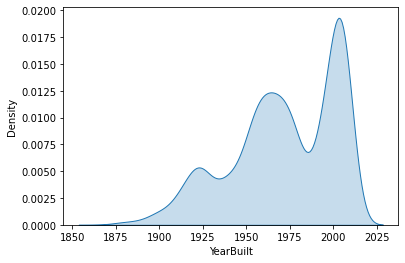

In [44]:
make_kdeplot('YearBuilt')

In [45]:
scatters('YearBuilt','SalePrice')

In [46]:
px.violin(data,y='YearBuilt')

In [47]:
px.violin(data,y='SalePrice')

In [48]:
scatters('GarageArea','SalePrice')

In [49]:
scatters('TotalBsmtSF','SalePrice')

### separate dependent & independent features

In [50]:
#convert categorical variable into dummy
data = pd.get_dummies(data)

In [51]:
data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0       706.0  ...               0             0   
1          1976         0.0       978.0  ...               0             0   
2          2002       162.0       486.0  ...               0             0   
3          1970         0.0       216.0  ...               0             0   
4          2000       350.0       655.0  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   
1             0            1                      0                      0   
2             0            1                      0                      0   
3             0            1                      1                      0   
4             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 277 columns]

### separate dependent & independent features

In [52]:
y=data['SalePrice']
X=data.drop('SalePrice',axis=1)
cols=X.columns
cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=276)

In [53]:
#Import Libraries
from sklearn.model_selection import train_test_split

In [54]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [55]:
#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1955, 276)
X_test shape is  (964, 276)
y_train shape is  (1955,)
y_test shape is  (964,)


### Select best features for model

In [56]:
print('Original X Shape is ' , X.shape)


Original X Shape is  (2919, 276)


In [57]:
#Import Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif 

In [58]:
#Feature Selection by KBest 
FeatureSelection = SelectKBest(score_func= chi2 ,k=3) # score_func can = f_classif 
X = FeatureSelection.fit_transform(X, y)

In [59]:
#showing X Dimension 
print('X Shape is ' , X.shape)
print('Selected Features are : ' , FeatureSelection.get_support())


X Shape is  (2919, 3)
Selected Features are :  [False False False  True False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 Fal

In [60]:
#Import Libraries
from sklearn.tree import DecisionTreeRegressor

In [61]:
#Applying DecisionTreeRegressor Model 

'''
sklearn.tree.DecisionTreeRegressor(criterion='mse’, splitter=’best’, max_depth=None,min_samples_split=2,
                                   min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_features=None,
                                   random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                   min_impurity_split=None, presort=False)
'''

DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=25,random_state=33)
DecisionTreeRegressorModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25, random_state=33)

In [62]:
#Calculating Details
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))

DecisionTreeRegressor Train Score is :  0.9978902981010488


In [63]:
#Calculating Prediction
y_pred = DecisionTreeRegressorModel.predict(X_test)
print('Predicted Value for DecisionTreeRegressorModel is : ' , y_pred[:10])

Predicted Value for DecisionTreeRegressorModel is :  [157000. 192000. 285000. 148000. 101800. 100000.  90000. 175000. 115000.
 248000.]
